In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Read

xGS_Total = pd.read_csv(r'CSVs\International\Int_xGS_Total.csv' ,encoding='latin-1')
xGA_Total = pd.read_csv(r'CSVs\International\Int_xGA_Total.csv' ,encoding='latin-1')
# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Get corrs between Gls and features
xGS_corrs = abs(xGS_Total.corr())['Gls'].sort_values(ascending=False)
xGA_corrs = abs(xGA_Total.corr())['O. Gls'].sort_values(ascending=False)

In [3]:
# It looks like G/Sh is the highest correlated feature with Gls.
xGS_corrs

Gls        1.000000
G/Sh       0.812597
SoT        0.779099
G/SoT      0.687219
Sh         0.599977
Poss       0.576907
SoT%       0.506920
PKatt      0.310739
MP         0.285975
O. CrdY    0.267001
CrdY       0.264677
Int        0.217464
Year       0.166428
CrdR       0.133139
Fld        0.121539
TklW       0.062697
O. TklW    0.062034
Age        0.048508
Name: Gls, dtype: float64

In [ ]:
xGA_corrs

In [ ]:
xGS_Total.columns

In [4]:
# first ML model for XGS & xGA, dropping irrelevant features AND FEATURES THAT ARE VERY SIMILAR 
xGS_Column_Drop_List = ['Key','Year','Competition','Squad','Age','Sh','MP','G/SoT','CrdY','CrdR','Fld','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List = ['Key','Year','Competition','Squad','O. Age','O. Sh','O. MP','O. G/SoT','O. CrdR','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_1 = xGS_Total.drop(xGS_Column_Drop_List, axis=1)
xGA_Model_1 = xGA_Total.drop(xGA_Column_Drop_List, axis=1)

In [5]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_1_features = xGS_Model_1.drop(['Confederation','Gls'], axis=1)
xGA_Model_1_features = xGA_Model_1.drop(['Confederation','O. Gls'], axis=1)

xGS_scaler = StandardScaler().fit(xGS_Model_1_features)
xGA_scaler = StandardScaler().fit(xGA_Model_1_features)


xGS_scaler_df = pd.DataFrame(xGS_scaler.transform(xGS_Model_1_features), columns = xGS_Model_1_features.columns)
xGA_scaler_df = pd.DataFrame(xGA_scaler.transform(xGA_Model_1_features), columns = xGA_Model_1_features.columns)

xGS_scaler_df['Gls'] = xGS_Model_1['Gls']
xGA_scaler_df['O. Gls'] = xGA_Model_1['O. Gls']
xGS_scaler_df['Confederation'] = xGS_Model_1['Confederation']
xGA_scaler_df['Confederation'] = xGA_Model_1['Confederation']

In [6]:
# Create final model variable and one-hot encode Confederation

xGS_Model_1_Final = pd.get_dummies(xGS_scaler_df, columns=['Confederation'])
xGA_Model_1_Final = pd.get_dummies(xGA_scaler_df, columns=['Confederation'])

In [7]:
xGS_Model_1_Final

,Poss,SoT,SoT%,PKatt,Int,O. CrdY,Gls,Confederation_AFC,Confederation_CAF,Confederation_CONCACAF,Confederation_CONMEBOL,Confederation_UEFA
0,1.695714,1.294321,0.212768,-0.869516,-0.406142,-0.651408,1.13,1,0,0,0,0
1,0.221953,-0.986076,-1.535799,3.084664,-1.023430,-0.120264,0.67,1,0,0,0,0
2,-0.334572,0.218906,-0.858060,0.487889,-0.341344,-0.530004,0.70,1,0,0,0,0
3,0.108587,-0.422455,0.009446,0.310836,-0.204926,-0.530004,1.20,1,0,0,0,0
4,-1.323950,-0.552023,0.009446,1.078065,0.681786,-0.636233,1.33,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.294095,-0.027273,0.660076,0.723960,-1.275802,0.835795,1.42,0,0,0,0,1
382,-2.540060,-1.912488,-1.291813,-0.869516,0.136117,-1.288781,0.10,0,0,0,0,1
383,-2.838935,-1.782920,1.703794,-0.869516,-0.955221,-1.440537,0.10,0,0,0,0,1
384,0.015833,-0.098535,0.009446,0.310836,-0.545969,0.684040,1.30,0,0,0,0,1


In [8]:
# Get features and target for both models

xGS_X = xGS_Model_1_Final.drop('Gls', axis=1).values
xGS_y = xGS_Model_1_Final['Gls'].values

xGA_X = xGA_Model_1_Final.drop('O. Gls', axis=1).values
xGA_y = xGA_Model_1_Final['O. Gls']

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=42, test_size=.25)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=42, test_size=.25)

In [10]:
# Evaluate Model function

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [ ]:
# xGS Model EXPLORATION:

TRAINING SET
root mean squared error (RMSE): 0.39442647490917304
R-squared (R2 ): 0.6692359057407328
MAE 0.3053590563326864

Testing SET
root mean squared error (RMSE): 0.41255344980709896
R-squared (R2 ): 0.617170480156242
MAE 0.3079631061202021


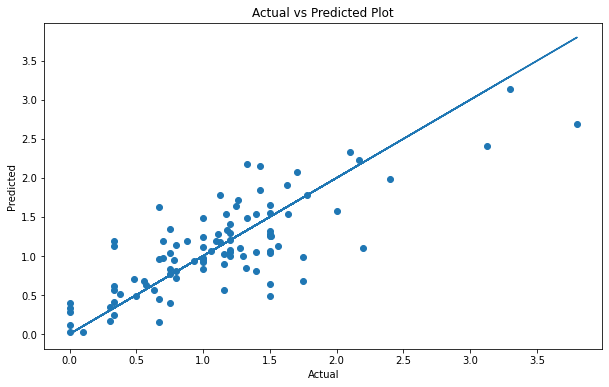

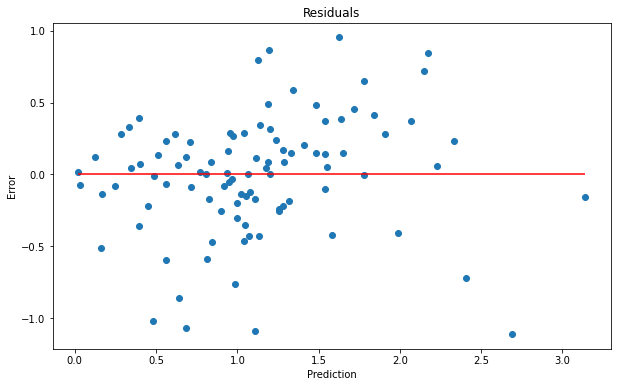

In [11]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.3944359990393535
R-squared (R2 ): 0.669219931770793
MAE 0.30536991027515326

Testing SET
root mean squared error (RMSE): 0.4122552743853198
R-squared (R2 ): 0.6177236647299452
MAE 0.30817446505786267


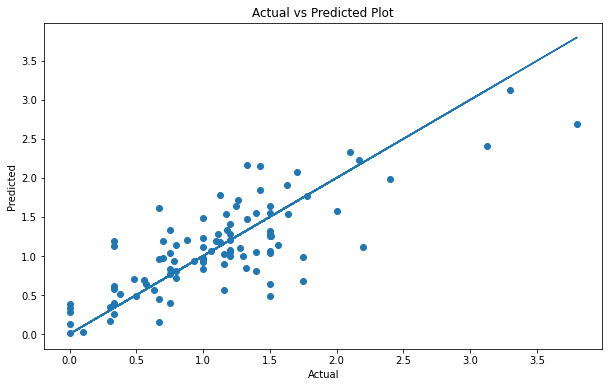

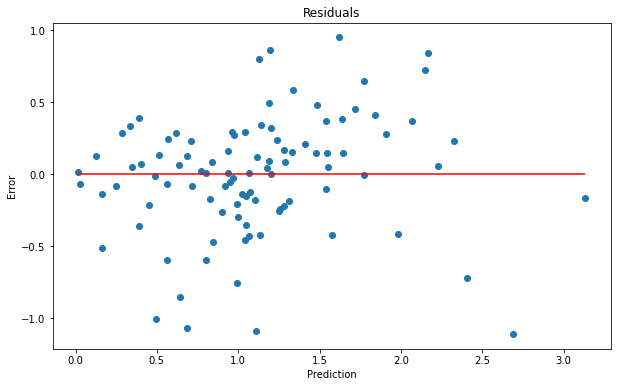

In [12]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
# Elastic net, DecisionTreeRegressor, 

TRAINING SET
root mean squared error (RMSE): 0.14795289814398416
R-squared (R2 ): 0.9534592694633532
MAE 0.11170588235294115

Testing SET
root mean squared error (RMSE): 0.46104405250530595
R-squared (R2 ): 0.5218878057921797
MAE 0.35298556701030925


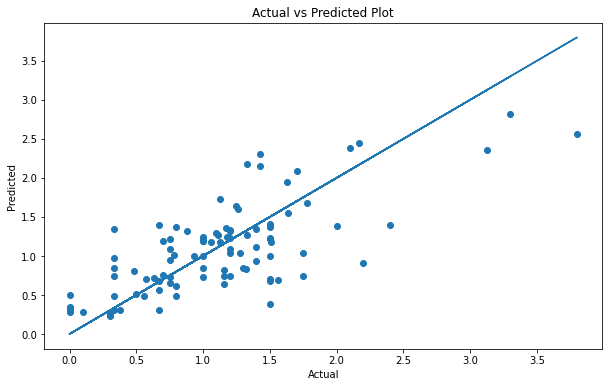

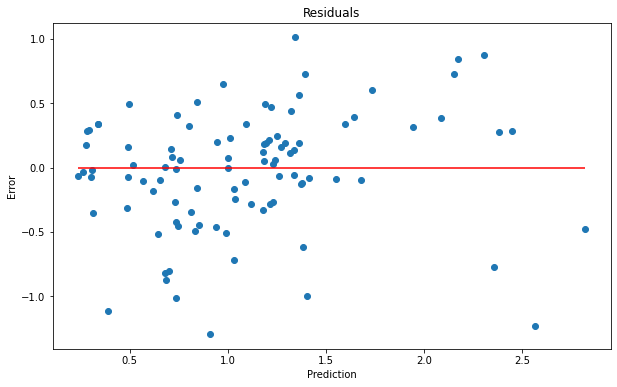

In [13]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.31525630587781084
R-squared (R2 ): 0.7886930374872358
MAE 0.2632757306747291

Testing SET
root mean squared error (RMSE): 0.44210807063982355
R-squared (R2 ): 0.56035528332061
MAE 0.3433168659152286


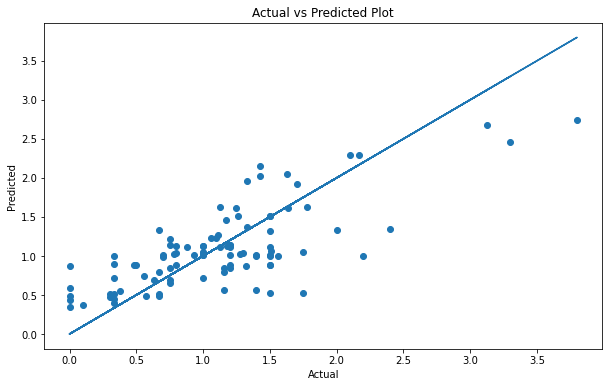

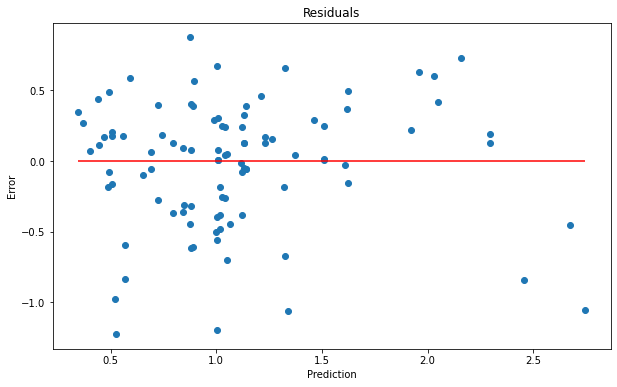

In [14]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.1905058201046612
R-squared (R2 ): 0.9228381308778192
MAE 0.1479699327235562

Testing SET
root mean squared error (RMSE): 0.4224250284069625
R-squared (R2 ): 0.5986306025850386
MAE 0.32328340616790807


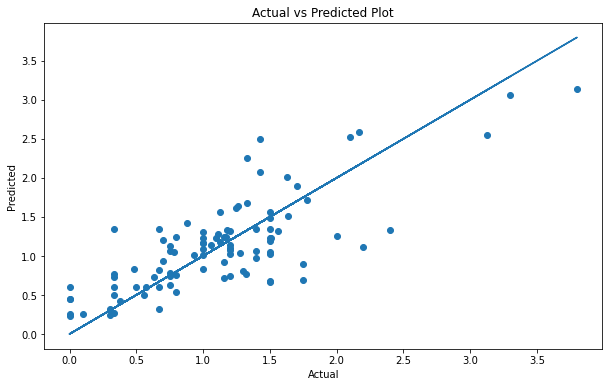

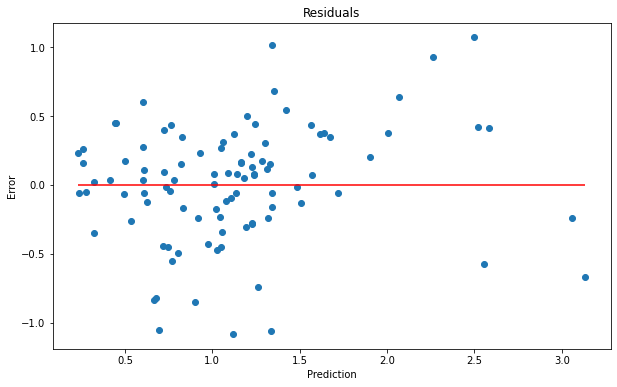

In [15]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.001295643232697648
R-squared (R2 ): 0.9999964309132445
MAE 0.0008591243254343474

Testing SET
root mean squared error (RMSE): 0.495547559920083
R-squared (R2 ): 0.44764834889073746
MAE 0.3849468126555079


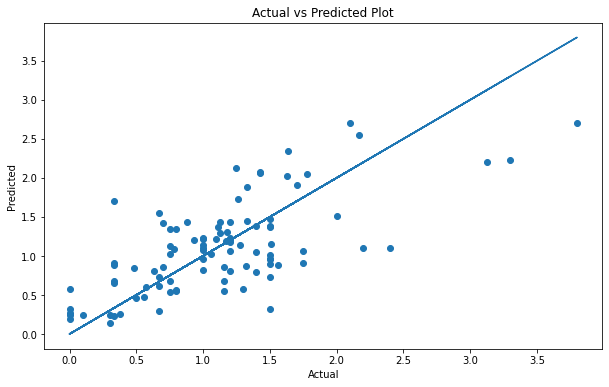

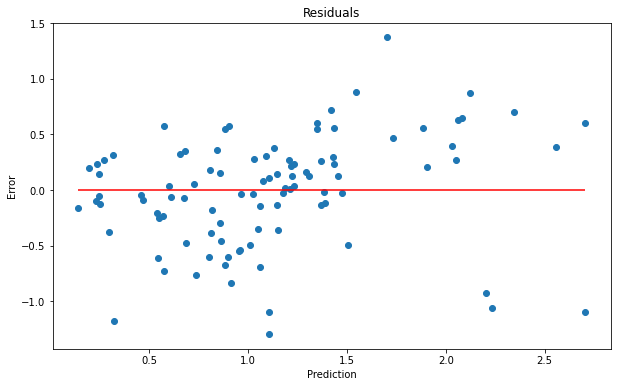

In [16]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.1915954458073072
R-squared (R2 ): 0.9219529295468729
MAE 0.14841241337404468

Testing SET
root mean squared error (RMSE): 0.4524207346943126
R-squared (R2 ): 0.5396056621049383
MAE 0.3465367998991519


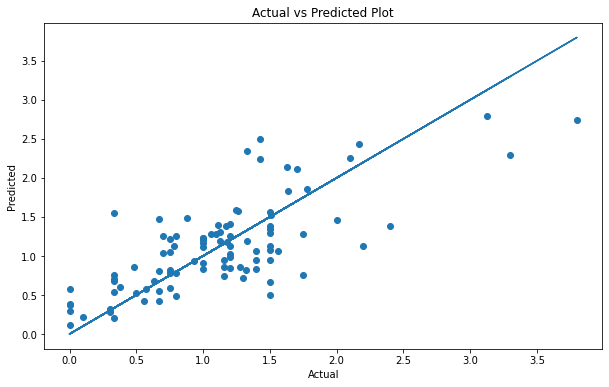

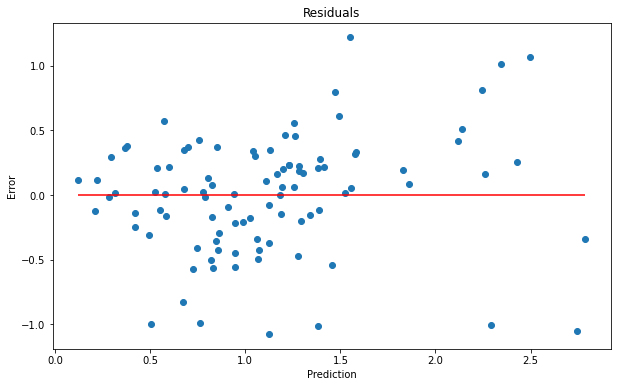

In [17]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.21869192114025232
R-squared (R2 ): 0.930258105464273
MAE 0.17232243624587487

Testing SET
root mean squared error (RMSE): 0.5290094363520558
R-squared (R2 ): 0.6520173583758563
MAE 0.39625908357499734


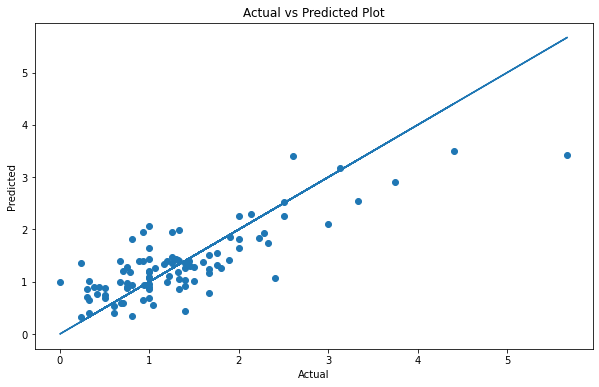

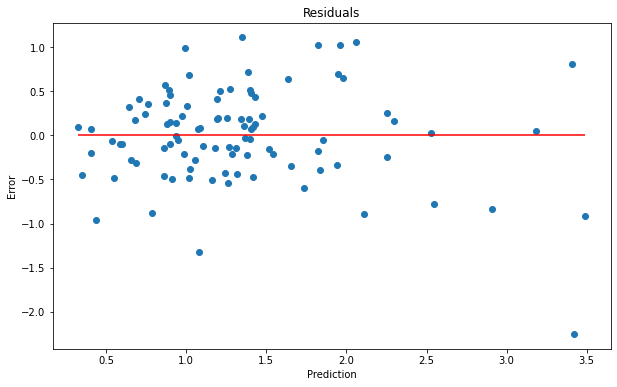

In [18]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

TRAINING SET
root mean squared error (RMSE): 0.4649110976572203
R-squared (R2 ): 0.6848131516699709
MAE 0.34798518398614425

Testing SET
root mean squared error (RMSE): 0.4684503497904311
R-squared (R2 ): 0.7271286887345083
MAE 0.3523619221929672


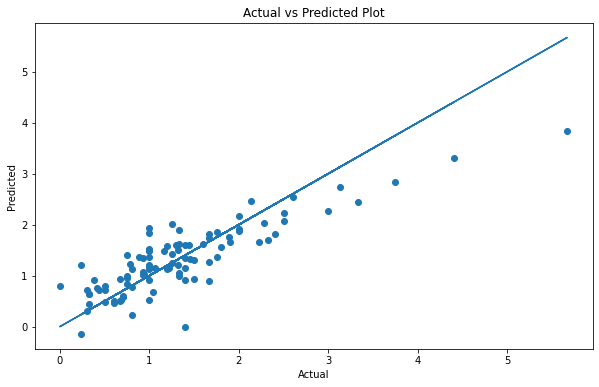

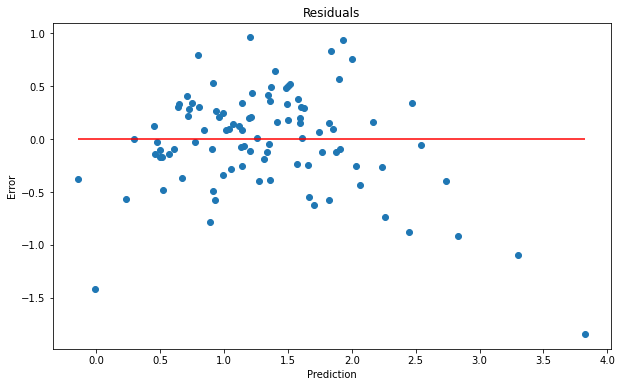

In [19]:
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)